### import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

11/06(수) 수업시간 내용인 횡단면 모멘텀 전략을 파이썬으로 구현하고, 프로그램과 실행결과 이미지 파일을 업로드하시오. 단,

- 데이터 파일은 첨부파일을 사용

- 제반 가정은 수업시간에 다룬 액셀파일("15.실습_횡단면모멘텀.xlsx")과 동일

- 모멘텀 측정 시 최근 1개월 포함

- 결과물: WML 포트폴리오와 Market Excess 포트폴리오의 성과비교(Value, MDD) 그래프

- 실행경과 출력되는 그래프의 형태는 "과제09"와 동일

- 제출파일: "과제11_횡단면모멘텀.py", "과제11_횡단면모멘텀.png"

In [403]:
data_pr = pd.read_excel('./Data_MSCI_m.xlsx',index_col=0, sheet_name='Price')
data_tr = pd.read_excel('./Data_MSCI_m.xlsx',index_col=0, sheet_name='TR')

In [404]:
data_tr.head()

,KOR,ENE,MAT,IND,COD,COS,HEL,FIN,INT,COM,UTI,CD1m
Date,,,,,,,,,,,,
1999-12-31,226.5405,227.7299,168.2037,77.6084,273.1986,216.2384,111.6638,128.2588,179.9822,679.1257,117.6740,6.035
2000-01-31,229.4655,194.0042,168.3982,72.7289,239.7664,180.3495,106.8242,145.1602,189.6285,631.0430,117.8845,5.990
2000-02-29,197.7762,175.9203,142.4108,61.2065,174.0816,162.8896,139.6472,108.5308,169.5523,701.1588,96.1361,6.040
2000-03-31,216.0902,175.7499,148.3821,62.3630,205.2977,160.2847,116.0205,93.4673,218.5814,600.9933,107.0014,6.030
2000-04-30,192.0454,144.5133,118.5218,56.5771,175.8892,141.9451,97.2228,77.6904,197.7839,492.4806,110.3671,6.090


In [405]:
hpr_tr = (data_tr/data_tr.shift(1)-1)*100
hpr_tr = hpr_tr.drop(hpr_tr.index[0]) #NaN값있는 첫열 삭제

In [406]:
hpr_tr['CD1m'] = data_tr['CD1m']/12 #Rf 추가
hpr_tr.head()

,KOR,ENE,MAT,IND,COD,COS,HEL,FIN,INT,COM,UTI,CD1m
Date,,,,,,,,,,,,
2000-01-31,1.291160,-14.809518,0.115634,-6.287335,-12.237325,-16.596913,-4.334081,13.177575,5.359586,-7.080088,0.178884,0.499167
2000-02-29,-13.810050,-9.321396,-15.432113,-15.842946,-27.395331,-9.681147,30.726184,-25.233776,-10.587122,11.111097,-18.448905,0.503333
2000-03-31,9.259962,-0.096862,4.193011,1.889505,17.931878,-1.599181,-16.918850,-13.879470,28.916800,-14.285708,11.301998,0.502500
2000-04-30,-11.127205,-17.773324,-20.123923,-9.277777,-14.324807,-11.441891,-16.202050,-16.879593,-9.514762,-18.055559,3.145473,0.507500
2000-05-31,0.211877,-13.683516,-12.361523,-13.294248,4.768229,-15.166709,-13.928112,1.635466,0.413380,30.508450,-6.817974,0.511667


In [407]:
sector_momentum = (data_pr / data_pr.shift(12)-1)*100
sector_momentum.drop('KOR',axis=1,inplace=True)
sector_momentum = sector_momentum.drop(sector_momentum.index[0:12])

In [408]:
sector_momentum.head()

,ENE,MAT,IND,COD,COS,HEL,FIN,INT,COM,UTI
Date,,,,,,,,,,
2000-12-31,-46.357529,-55.041617,-58.536271,-52.953880,-54.629116,-62.869425,-39.536878,-44.754973,-36.077040,-33.041557
2001-01-31,-35.701879,-41.403700,-39.192232,-27.842870,-38.963510,-45.743269,-25.968992,-24.997346,-27.068206,-24.855541
2001-02-28,-29.092176,-28.186432,-32.307692,0.704184,-21.743710,-58.097034,-0.972042,-27.000712,-46.665335,-9.263959
2001-03-31,-29.022137,-38.648370,-42.343673,-14.305618,-30.050378,-56.232542,-11.324482,-40.179599,-46.437490,-35.917902
2001-04-30,-13.680045,-16.303041,-34.768452,16.035544,-14.157719,-54.062500,23.630363,-27.402280,-20.422964,-30.032243


In [409]:
sector_rank = sector_momentum.rank(axis=1,ascending=False)

In [410]:
sector_rank.head()

,ENE,MAT,IND,COD,COS,HEL,FIN,INT,COM,UTI
Date,,,,,,,,,,
2000-12-31,5.0,8.0,9.0,6.0,7.0,10.0,3.0,4.0,2.0,1.0
2001-01-31,6.0,9.0,8.0,5.0,7.0,10.0,3.0,2.0,4.0,1.0
2001-02-28,7.0,6.0,8.0,1.0,4.0,10.0,2.0,5.0,9.0,3.0
2001-03-31,3.0,6.0,8.0,2.0,4.0,10.0,1.0,7.0,9.0,5.0
2001-04-30,3.0,5.0,9.0,2.0,4.0,10.0,1.0,7.0,6.0,8.0


In [411]:
df_test = sector_rank.copy()

In [412]:
for i in df_test.columns:
    df_test[i] = np.where(df_test[i] == 1.0, 0.5 , df_test[i])
    df_test[i] = np.where(df_test[i] == 2.0, 0.5 , df_test[i])
    df_test[i] = np.where(df_test[i] == 3.0, 0 , df_test[i])
    df_test[i] = np.where(df_test[i] == 4.0, 0 , df_test[i])
    df_test[i] = np.where(df_test[i] == 5.0, 0 , df_test[i])
    df_test[i] = np.where(df_test[i] == 6.0, 0 , df_test[i])
    df_test[i] = np.where(df_test[i] == 7.0, 0 , df_test[i])
    df_test[i] = np.where(df_test[i] == 8.0, 0 , df_test[i])
    df_test[i] = np.where(df_test[i] == 9.0, -0.5 , df_test[i])
    df_test[i] = np.where(df_test[i] == 10.0, -0.5 , df_test[i])
    

In [413]:
hpr_tr_ex = hpr_tr.copy()  #Tr데이터를 모멘텀데이터와 시계열을 맞춰주기
del hpr_tr_ex['CD1m']
del hpr_tr_ex['KOR']
hpr_tr_ex = hpr_tr_ex.drop(hpr_tr_ex.index[0:11,])
hpr_tr_ex.head()

,ENE,MAT,IND,COD,COS,HEL,FIN,INT,COM,UTI
Date,,,,,,,,,,
2000-12-31,0.0,4.125300,-4.691167,-5.999393,-3.121319,-14.711480,0.803323,-3.336600,4.860628,2.608723
2001-01-31,0.0,32.864812,37.979006,38.597310,13.526576,42.970614,40.734893,44.513843,6.293384,13.324095
2001-02-28,0.0,3.640762,-6.333760,1.329715,15.802031,0.955879,0.014025,-12.970445,-18.745198,-1.533364
2001-03-31,0.0,-10.985617,-13.198382,0.354319,-12.044572,-13.219630,-24.120299,5.636587,-13.918996,-21.399851
2001-04-30,0.0,8.967495,2.647032,16.009944,8.682115,-12.050184,15.887302,9.809463,21.742894,12.622643


In [414]:
df_test.head()

,ENE,MAT,IND,COD,COS,HEL,FIN,INT,COM,UTI
Date,,,,,,,,,,
2000-12-31,0.0,0.0,-0.5,0.0,0.0,-0.5,0.0,0.0,0.5,0.5
2001-01-31,0.0,-0.5,0.0,0.0,0.0,-0.5,0.0,0.5,0.0,0.5
2001-02-28,0.0,0.0,0.0,0.5,0.0,-0.5,0.5,0.0,-0.5,0.0
2001-03-31,0.0,0.0,0.0,0.5,0.0,-0.5,0.5,0.0,-0.5,0.0
2001-04-30,0.0,0.0,-0.5,0.5,0.0,-0.5,0.5,0.0,0.0,0.0


In [415]:
ls_Rp = []
for i in range(0,225):
    d = df_test.iloc[i,:]*hpr_tr_ex.iloc[i+1]
    sumproduct = sum(d)
    ls_Rp.append(sumproduct)

In [416]:
ls_Rp.insert(0,0)

In [417]:
ls_Rp

[0,
 -30.66607081244414,
 -9.550225127875379,
 1.6863233819372487,
 11.10226747965931,
 5.371343090457415,
 17.910645168920247,
 -8.053677527580394,
 -3.3671994742369926,
 5.463127449890515,
 -9.52676455200056,
 20.892993796079743,
 -159.447567600132,
 6.880420169373503,
 13.539099641028718,
 -12.08430979269146,
 16.262521465906953,
 -6.511253024141212,
 4.429514056536566,
 11.263051700238298,
 -10.63846632935828,
 -16.725670199361655,
 14.975332583781299,
 11.756346514915624,
 -12.976617651364247,
 3.466435971297055,
 -8.212739338638864,
 11.51945367319922,
 -5.412609750527551,
 -3.0867205425391453,
 -5.516269641260562,
 13.183884324923955,
 2.6665259297931065,
 -3.0344921499615545,
 7.588546963807584,
 7.732758736338186,
 3.012817903179121,
 0.544521515178253,
 14.481705323339257,
 11.1370949605269,
 4.3304770513834905,
 -2.3680709695731608,
 -3.5439478642978974,
 3.8411964064403277,
 -9.83701877325402,
 10.84747165940937,
 3.8010918367570086,
 7.561647715312901,
 -7.9611650455993495

In [418]:
Date = pd.read_excel('./Data_MSCI_m.xlsx', sheet_name='TR')
Date = Date.drop(Date.index[0:12])
Date = Date.loc[:,"Date"]

In [419]:
Rp = pd.DataFrame(ls_Rp, index = Date, columns = ["RP"])
Rp.head()

,RP
Date,
2000-12-31,0.000000
2001-01-31,-30.666071
2001-02-28,-9.550225
2001-03-31,1.686323
2001-04-30,11.102267


In [420]:
stDate = '2002-12-31'

a = Rp.loc[stDate:, :]
a.iloc[0,0] = 0
Vp = ((a/100 + 1).cumprod() * 100) #Vp
Vmax = Vp.cummax() 
MDD_Vp = (Vp/Vmax-1)*100 #MDD

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [421]:
df_rm = hpr_tr.loc[stDate:,:]
df_rm = df_rm.iloc[:,[0,11]]
df_rm.head()

,KOR,CD1m
Date,,
2002-12-31,-12.558487,0.385417
2003-01-31,-6.129498,0.370417
2003-02-28,-3.922477,0.366667
2003-03-31,-5.038432,0.373750
2003-04-30,10.605612,0.366667


In [422]:
rmrf.head()

Date
2002-12-31     0.000000
2003-01-31    -6.499915
2003-02-28    -4.289144
2003-03-31    -5.412182
2003-04-30    10.238946
dtype: float64

In [429]:
rmrf = df_rm.loc[:,"KOR"] - df_rm.loc[:,"CD1m"]
df_rmrf_rp = pd.DataFrame(rmrf, columns=['RmRf_rp'])

df_rmrf_rp.iloc[0,0] = 0
df_rmrf_vp = ((df_rmrf_rp /100) + 1).cumprod()*100
df_rmrf_vp.head()

,RmRf_rp
Date,
2002-12-31,100.000000
2003-01-31,93.500085
2003-02-28,89.489732
2003-03-31,84.646385
2003-04-30,93.313282


In [424]:
vmax_rmrf = df_rmrf_vp.cummax()
MDD_rmrf =( df_rmrf_vp/vmax_rmrf-1)*100

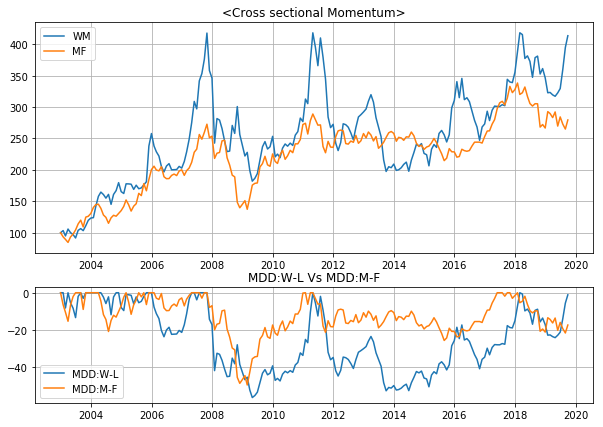

In [430]:
# 그래프 그리기
fig = plt.figure(figsize = (10,7))
gs = gridspec.GridSpec(nrows=2,
                       ncols =1,
                       height_ratios= [8,4],
                       width_ratios= [5]) #subplot의 크기를 서로 다르게 설정

#Value
ax0 = plt.subplot(gs[0])
ax0.plot(Vp, label = 'WM');
ax0.plot(df_rmrf_vp, label = 'MF');
plt.title('<Cross sectional Momentum>')
ax0.grid(True)
ax0.legend()

#MDD
ax1 = plt.subplot(gs[1])
ax1.plot( MDD_Vp, label = 'MDD:W-L');
ax1.plot( MDD_rmrf, label = 'MDD:M-F');
plt.title('MDD:W-L Vs MDD:M-F')
ax1.grid(True)
ax1.legend()